<a href="https://colab.research.google.com/github/Jhaan27/Process_Dig_img/blob/main/PB%2C_PA_e_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos na pasta: ['poster_sample.pdf', 'Formulário sem título (4).gform', 'Photos', 'Proteus_8.6_SP2_Pro.rar', 'Fundamentos de Circuitos Elétricos Sadiku - 5 Edição - Completo.pdf', 'Foto.pdf', 'formt.pdf', 'Jhanthings.pdf', 'Jhanthings.docx', 'Dados projeto elétrico ', 'mpdf.pdf', 'Memorial - The end.pdf', 'Documento.pdf', 'Tenis de mesa', 'Cópia de Provas Passadas - Conversão.pdf', 'Ativador Office 2016', 'SIGAA - Sistema Integrado de Gestão de Atividades Acadêmicas.pdf', 'Horários de treino- Vôlei Olympia.gform', 'PMUC.rar', 'Farmácia - PMUC.odt', 'yasmim anv .pdf', 'Toddy.pdf', 'Informações de contato.gform', 'Formulário sem título (3).gform', 'Consulta de disponibilidade para treino.gsheet', 'Sammy_Janeiro_2021.gsheet', 'Sammy historiadora', 'Formulário sem título (2).gform', 'Formulário sem título (1).gform', 'eez-hyqj-ucj – 15 de

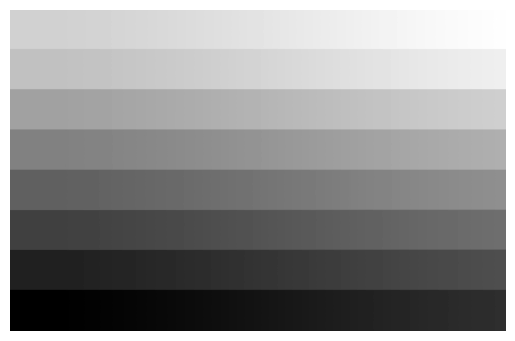

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Monta o Google Drive
drive.mount('/content/drive')

# Caminho para a pasta no Google Drive onde suas imagens estão armazenadas
folder_path = '/content/drive/MyDrive/'

# Lista os arquivos na pasta
files_list = os.listdir(folder_path)
print("Arquivos na pasta:", files_list)

# Escolhe uma imagem para carregar (substitua 'nome_da_imagem.jpg' pelo nome real do arquivo)
chosen_file = 'grays.png'

# Caminho completo para a imagem escolhida
image_path = os.path.join(folder_path, chosen_file)

# Lê a imagem usando OpenCV (certifique-se de que é uma imagem em tons de cinza)
imagex = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Exibe a imagem
plt.imshow(imagex, cmap='gray')
plt.axis('off')
plt.show()


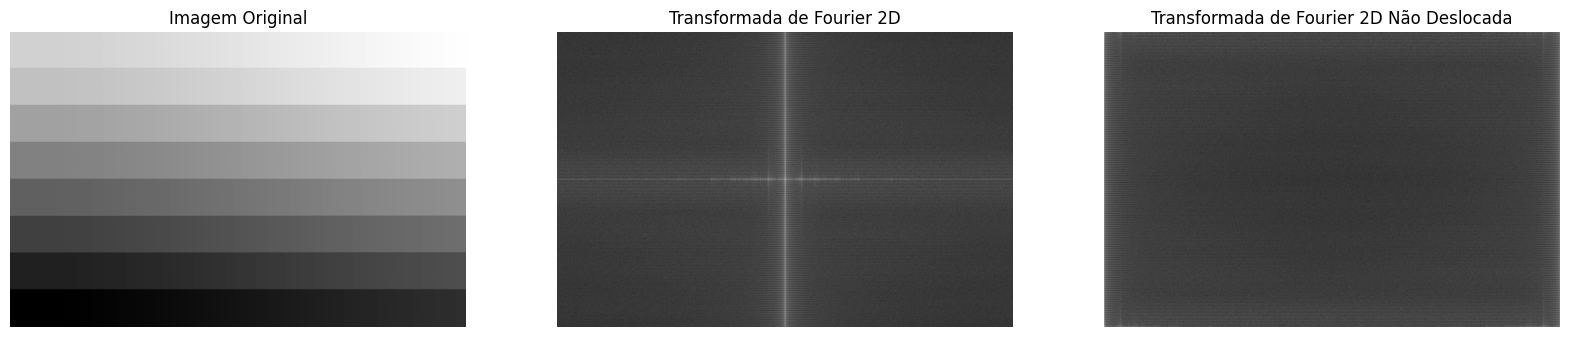

Filtros a seguir


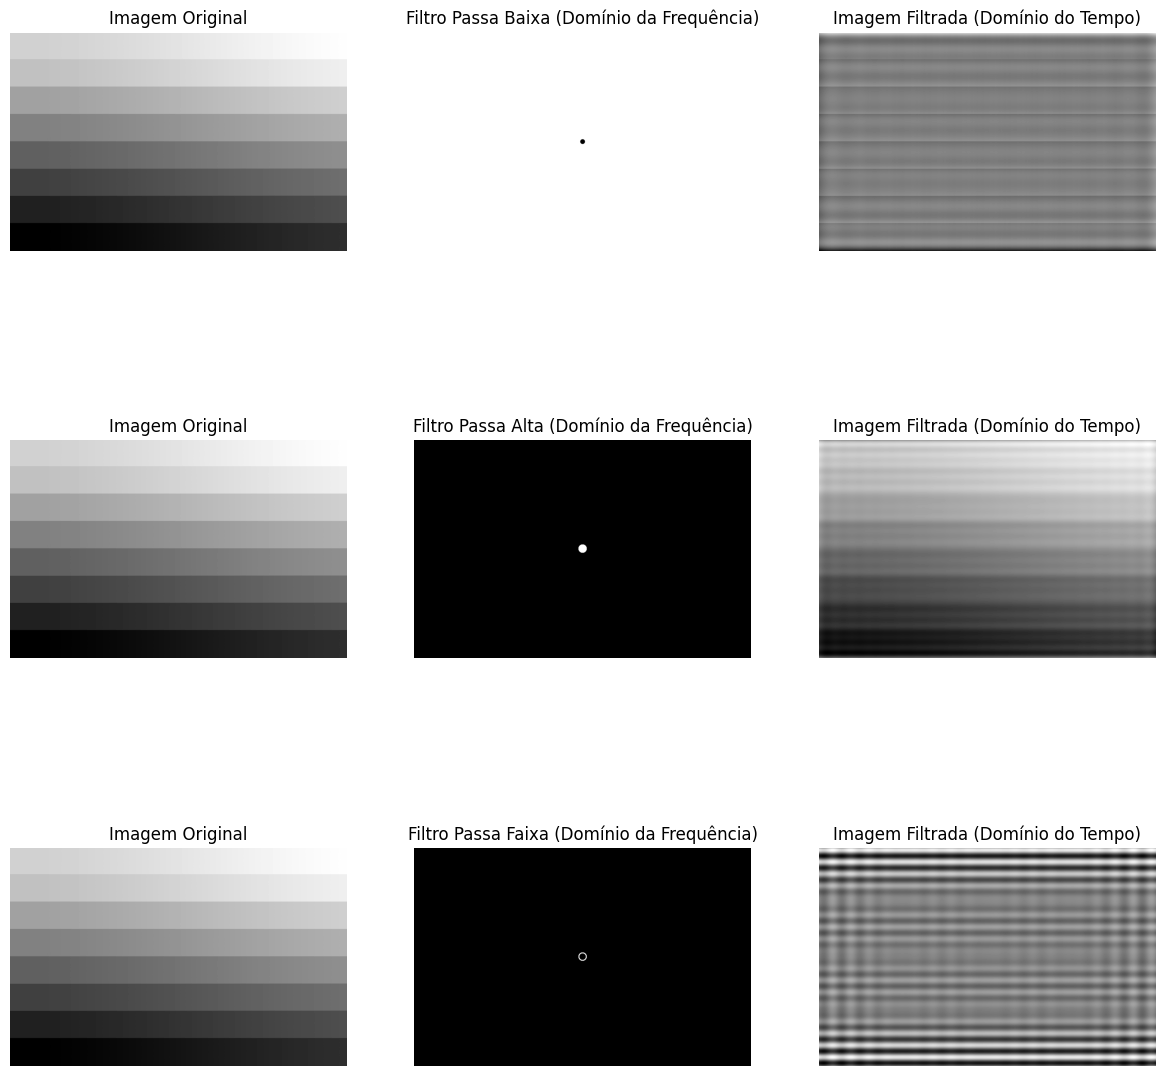

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, filter_type, cutoff_frequency):


    # Calcula as dimensões da imagem e o centro
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Cria o filtro
    mask = np.ones((rows, cols), np.uint8)

    if filter_type == 'low_pass':
        r = cutoff_frequency
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
        mask[mask_area] = 0

    elif filter_type == 'high_pass':
        r = cutoff_frequency
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 >= r*r
        mask[mask_area] = 0

    elif filter_type == 'band_pass':
        r_inner, r_outer = cutoff_frequency
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area_inner = (x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_inner*r_inner
        mask_area_outer = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_outer*r_outer
        mask[mask_area_inner | mask_area_outer] = 0

    # Aplica o filtro
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Transformada inversa de Fourier
    f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
    image_filtered = np.fft.ifft2(f_transform_filtered).real

    return image_filtered, mask

# Carrega uma imagem para teste (substitua pelo caminho real da sua imagem)
image = imagex.copy()

# Transformada de Fourier 2D
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Calcula a magnitude do espectro
magnitude_spectrum = np.log(1 + np.abs(f_transform_shifted))

# Plota a imagem original
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')

# Plota a Transformada de Fourier 2D
plt.subplot(1, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Transformada de Fourier 2D'), plt.axis('off')

# Plota a versão deslocada da Transformada de Fourier 2D
plt.subplot(1, 3, 3), plt.imshow(np.log(1 + np.abs(f_transform)), cmap='gray')
plt.title('Transformada de Fourier 2D Não Deslocada'), plt.axis('off')

plt.show()

# Parâmetros dos filtros
low_pass_cutoff = 12
high_pass_cutoff = 21 # passa baixa
band_pass_cutoff = (21,16)

# Aplica os filtros
low_pass_result, low_pass_mask = apply_filter(image, 'low_pass', low_pass_cutoff)
high_pass_result, high_pass_mask = apply_filter(image, 'high_pass', high_pass_cutoff)
band_pass_result, band_pass_mask = apply_filter(image, 'band_pass', band_pass_cutoff)

# Texto que você deseja exibir
texto = "Filtros a seguir"

# Cria uma célula de texto no Colab
print(texto)

# Plota as imagens lado a lado no domínio do tempo
plt.figure(figsize=(20, 15))

# Imagem Original
plt.subplot(3, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')

# Filtro Passa Baixa
plt.subplot(3, 4, 2), plt.imshow(low_pass_mask, cmap='gray')
plt.title('Filtro Passa Baixa (Domínio da Frequência)'), plt.axis('off')

plt.subplot(3, 4, 3), plt.imshow(low_pass_result, cmap='gray')
plt.title('Imagem Filtrada (Domínio do Tempo)'), plt.axis('off')

# Imagem Original
plt.subplot(3, 4, 5), plt.imshow(image, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')

# Filtro Passa Alta
plt.subplot(3, 4, 6), plt.imshow(high_pass_mask, cmap='gray')
plt.title('Filtro Passa Alta (Domínio da Frequência)'), plt.axis('off')

plt.subplot(3, 4, 7), plt.imshow(high_pass_result, cmap='gray')
plt.title('Imagem Filtrada (Domínio do Tempo)'), plt.axis('off')

# Imagem Original
plt.subplot(3, 4, 9), plt.imshow(image, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')

# Filtro Passa Faixa
plt.subplot(3, 4, 10), plt.imshow(band_pass_mask, cmap='gray')
plt.title('Filtro Passa Faixa (Domínio da Frequência)'), plt.axis('off')

plt.subplot(3, 4, 11), plt.imshow(band_pass_result, cmap='gray')
plt.title('Imagem Filtrada (Domínio do Tempo)'), plt.axis('off')

plt.show()
